# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business objective is to identify the key factors that influence used car prices to support pricing strategies and inventory valuation. 

From a data science perspective, this translates into a supervised regression problem, where the goal is to build a predictive model that estimates a car’s price based on various structured features such as year, odometer, manufacturer, model, and condition. 

#### The task also involves 
##### feature selection, 
##### exploratory data analysis, and 
##### handling missing or inconsistent data to ensure robust and interpretable modeling outcomes.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_csv("data/vehicles.csv")

df.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [4]:
df.shape

(426880, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
df.select_dtypes(include=['object']).columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [7]:

df.select_dtypes(include = "object").agg(["nunique"])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
nunique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51


count         426,880
mean           75,199
std        12,182,282
min                 0
25%             5,900
50%            13,950
75%            26,486
max     3,736,928,711
Name: price, dtype: float64
----------------------------------------------------------------------------------------------------
Number of price outliers: 7779
Lower bound: $-23,885
Upper bound: $58,475
----------------------------------------------------------------------------------------------------

Top 10 highest price outliers:
             price    year   manufacturer                   model
318592  3736928711  2007.0         toyota                  tundra
356716  3736928711  1999.0         toyota                 4runner
91576   3024942282  2000.0  mercedes-benz               benz e320
257840  3024942282  2000.0  mercedes-benz               benz s430
37410   3009548743  2021.0      chevrolet                     NaN
184704  1410065407  1989.0           jeep                wrangler
153082  1234567890  2006.0

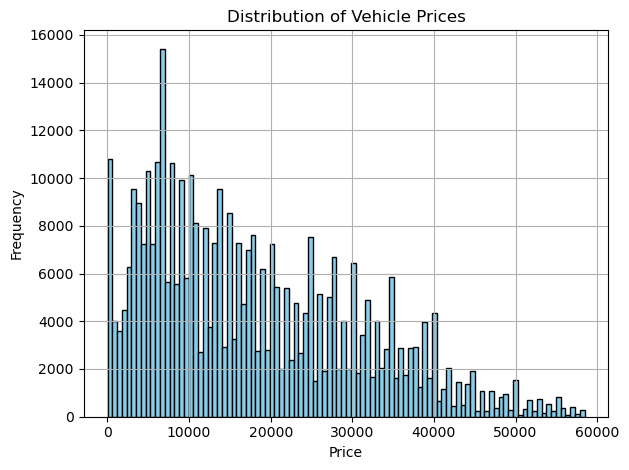

In [8]:
# Plot histogram of the 'price' column

# Print the full statistical summary of the 'price' column with complete numeric values (not in scientific notation)
with pd.option_context('display.float_format', '{:,.0f}'.format):
    print(df.price.describe())

# Find price outliers using IQR

# Remove rows with price = 0 for outlier analysis
df_non_zero = df[df["price"] != 0]

# Calculate Q1, Q3, and IQR
Q1 = df_non_zero['price'].quantile(0.25)
Q3 = df_non_zero['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_non_zero[(df_non_zero['price'] < lower_bound) | (df_non_zero['price'] > upper_bound)]

print("--" * 50)

print(f"Number of price outliers: {outliers.shape[0]}")
print(f"Lower bound: ${lower_bound:,.0f}")
print(f"Upper bound: ${upper_bound:,.0f}")

print("--" * 50)
# Show some extreme outliers
print("\nTop 10 highest price outliers:")
print(outliers.nlargest(10, 'price')[[ 'price', 'year', 'manufacturer', 'model']])

print("\nTop 10 lowest price outliers:")
print(outliers.nsmallest(10, 'price')[[ 'price', 'year', 'manufacturer', 'model']])

print("--" * 50)

# Filter out price outliers from df (using IQR bounds calculated above)
df_no_outliers = df_non_zero[(df_non_zero['price'] >= lower_bound) & (df_non_zero['price'] <= upper_bound)]

with pd.option_context('display.float_format', '{:,.0f}'.format):
    print(df_no_outliers.price.describe())

print("--" * 50)

df_no_outliers["price"].hist(bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Checking NULL values

In [9]:
# df.isnull().sum().sort_values(ascending=False)

null_counts = df.isnull().sum()
total_rows = len(df)

# Calculate percentage of null values for each column
null_percentages = ((null_counts / total_rows) * 100).round(2)

# Sort by percentage in descending order
null_percentages.sort_values(ascending=False, inplace=True)

# Print the results
print(null_percentages)

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
id               0.00
region           0.00
price            0.00
state            0.00
dtype: float64


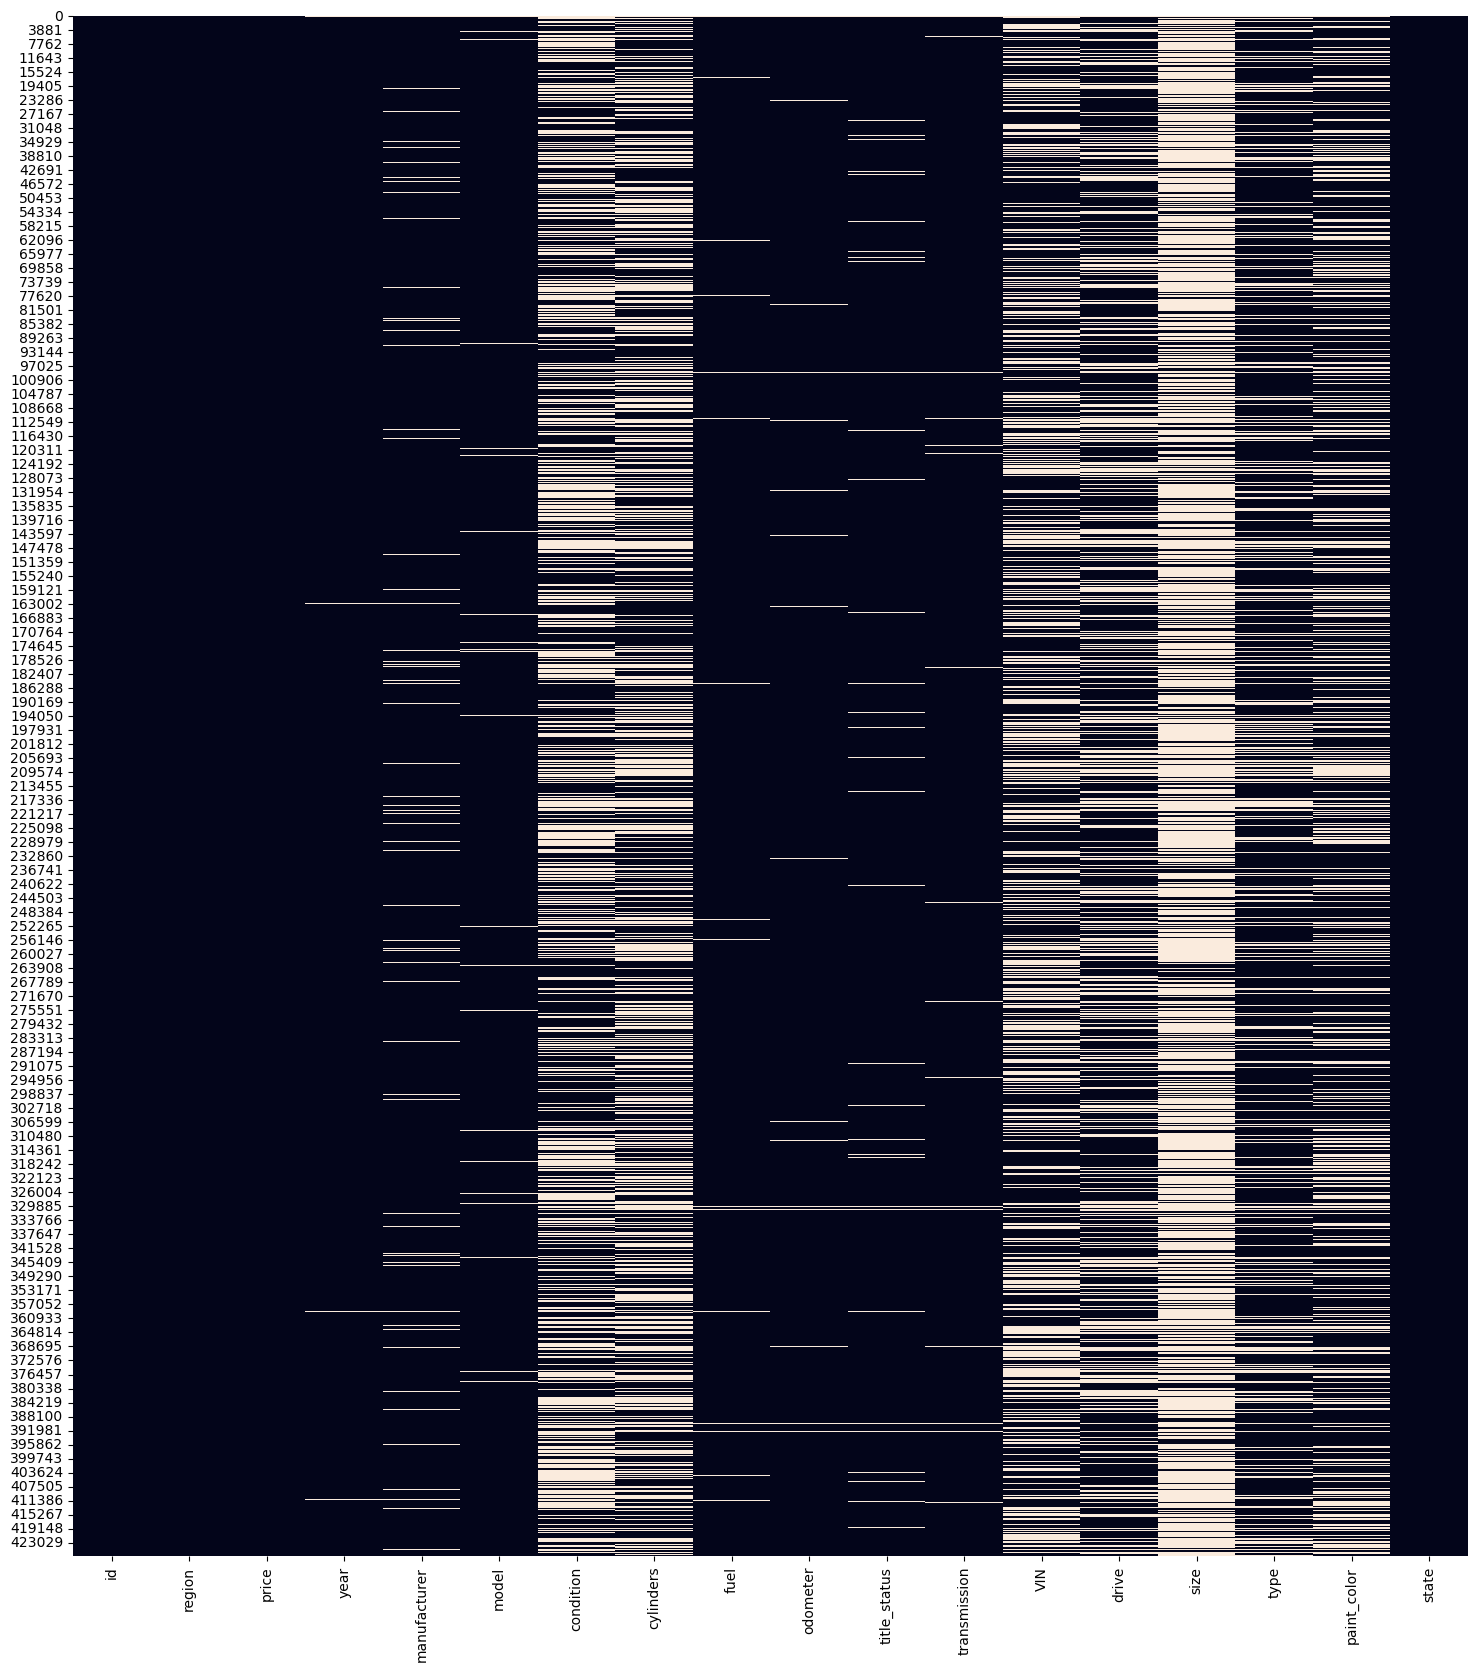

In [10]:
# Visualize Missing Data

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 20))
sns.heatmap(df.isnull(), cbar=False)
plt.show()




In [11]:

print(f"condition with unique values including NaN {df["condition"].value_counts(dropna=False)}")
print()
print(f"cylinders with unique values including NaN {df["cylinders"].value_counts(dropna=False)}")
print()
print(f"VIN with unique values including NaN {df["VIN"].value_counts(dropna=False)}")
print()
print(f"drive with unique values including NaN {df["drive"].value_counts(dropna=False)}")
print()
print(f"size with unique values including NaN {df["size"].value_counts(dropna=False)}")
print()
print(f"type with unique values including NaN {df["type"].value_counts(dropna=False)}")
print()
print(f"paint_color with unique values including NaN {df["paint_color"].value_counts(dropna=False)}")

condition with unique values including NaN condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

cylinders with unique values including NaN cylinders
NaN             177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: count, dtype: int64

VIN with unique values including NaN VIN
NaN                  161042
1FMJU1JT1HEA52352       261
3C6JR6DT3KG560649       235
1FTER1EH1LLA36301       231
5TFTX4CN3EX042751       227
                      ...  
1GCEK19J78Z219711         1
JA4AT3AW1AZ006543         1
4T1BF28B61U153724         1
JTHCF5C25A5041393         1
SAJGX2749VCOO8376         1
Name: count, Length: 118247, dtype: int64

drive with unique values including NaN drive
4wd    131904
NaN    130567
fwd    105517
rwd     58892


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Remove NULL data 

In [12]:
df_no_outliers_cleaned = df_no_outliers.dropna(subset=["cylinders", "manufacturer", "title_status", "model", "odometer", "fuel", "transmission"])

df_no_outliers_cleaned.isnull().sum().sort_values(ascending=False)

size            116560
VIN              90901
condition        52664
paint_color      35504
drive            28608
type             23201
year                 1
id                   0
title_status         0
transmission         0
odometer             0
region               0
fuel                 0
cylinders            0
model                0
manufacturer         0
price                0
state                0
dtype: int64

#### Univariate Analysis : odometer

In [13]:
df_no_outliers_cleaned['odometer'].describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2)

count      210598.00
mean       104879.63
std        183658.64
min             0.00
1%            185.00
5%          11948.85
10%         21812.00
25%         49000.00
50%         97000.00
75%        142000.00
90%        183569.90
95%        210000.00
99%        274517.15
max      10000000.00
Name: odometer, dtype: float64

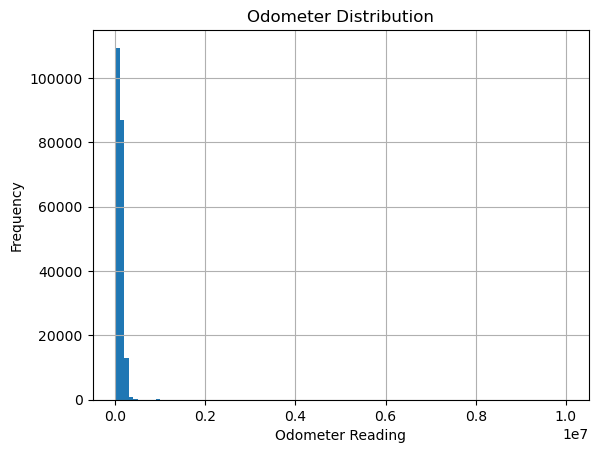

In [14]:
df_no_outliers_cleaned['odometer'].hist(bins=100)
plt.title('Odometer Distribution')
plt.xlabel('Odometer Reading')
plt.ylabel('Frequency')
plt.show()

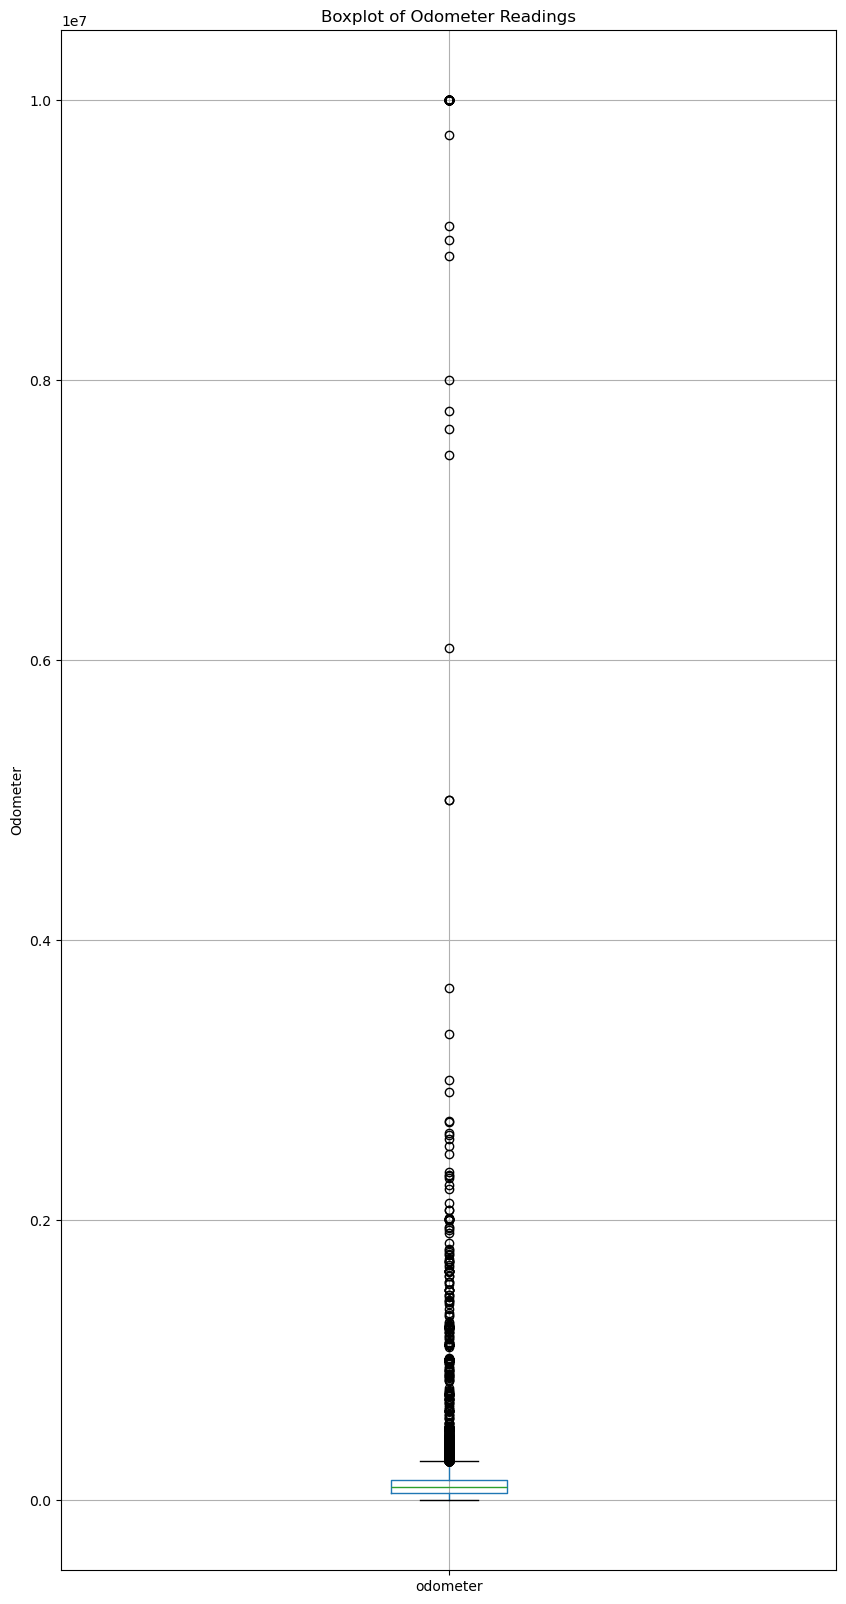

In [15]:
plt.figure(figsize=(10, 20))
df_no_outliers_cleaned.boxplot(column='odometer')
plt.title('Boxplot of Odometer Readings')
plt.ylabel('Odometer')
plt.show()


<Axes: ylabel='Density'>

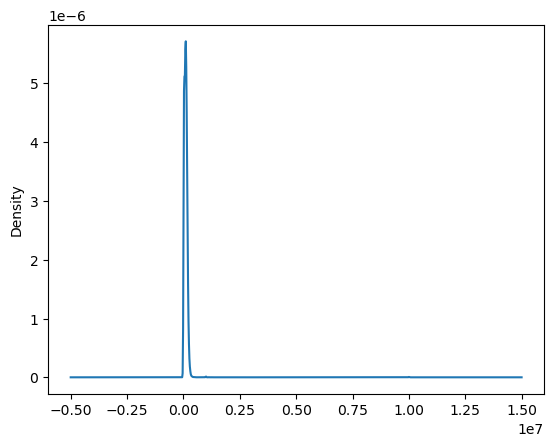

In [16]:
df_no_outliers_cleaned['odometer'].plot.kde()

In [17]:
# Check Skewness
df_no_outliers_cleaned["odometer"].skew()

43.92215530786395

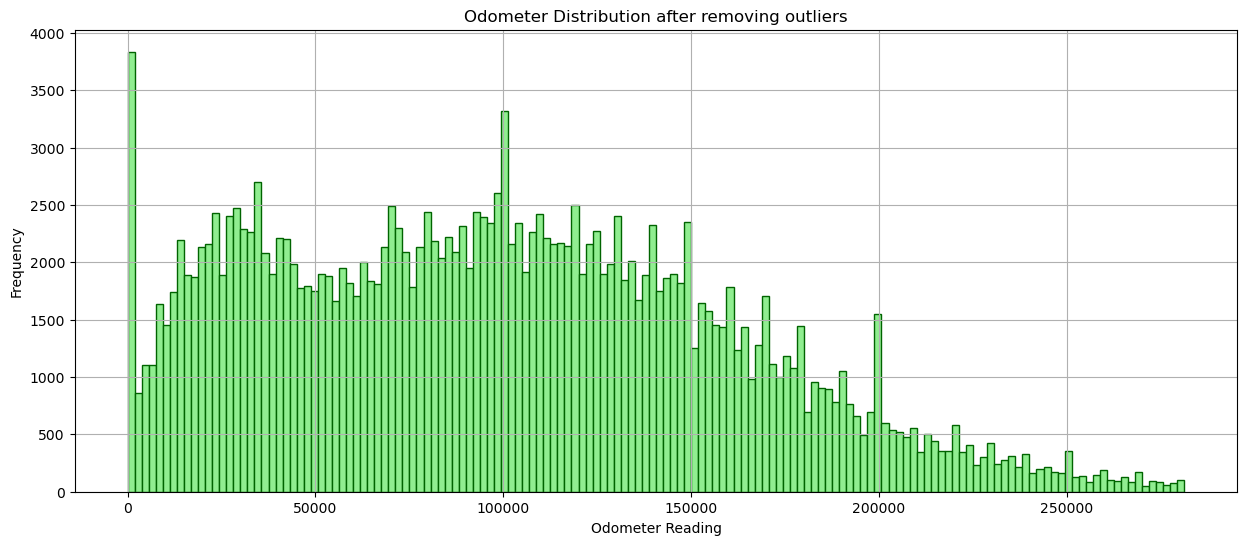

In [18]:
# Remove outliers from the 'odometer' column using the IQR method
Q1 = df_no_outliers_cleaned['odometer'].quantile(0.25)
Q3 = df_no_outliers_cleaned['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_odometer_no_outliers = df_no_outliers_cleaned[
    (df_no_outliers_cleaned['odometer'] >= lower_bound) &
    (df_no_outliers_cleaned['odometer'] <= upper_bound)
].copy()

df_odometer_no_outliers["odometer"].skew()

plt.figure(figsize=(15, 6))
df_odometer_no_outliers["odometer"].hist(bins=150, color='lightgreen', edgecolor='darkgreen')
plt.title('Odometer Distribution after removing outliers')
plt.xlabel('Odometer Reading')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Calculate the age of the car based on the 'year' column
from datetime import datetime

current_year = datetime.now().year
df_odometer_no_outliers['age'] = current_year - df_odometer_no_outliers['year']

df_odometer_no_outliers = df_odometer_no_outliers[df_odometer_no_outliers['age'].notnull()]

print(df_odometer_no_outliers['age'].isnull().sum())


0


In [20]:
df_odometer_no_outliers.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
age             float64
dtype: object

title_status
clean         199480
rebuilt         5263
salvage         2597
lien            1057
missing          310
parts only        75
Name: count, dtype: int64


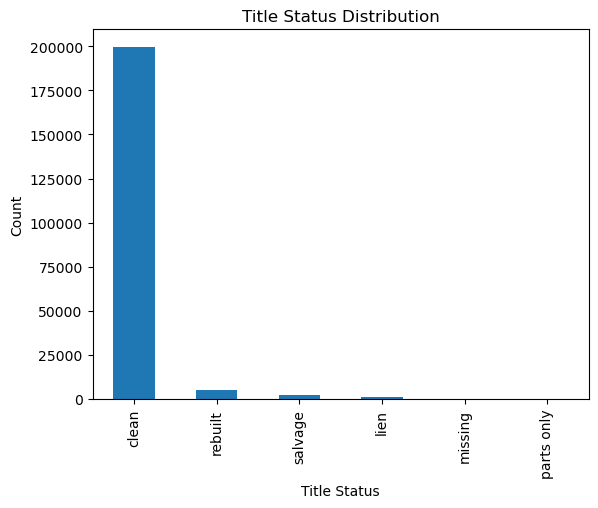

In [21]:
print(df_odometer_no_outliers["title_status"].value_counts(dropna=False))

df_odometer_no_outliers["title_status"].value_counts().plot(kind='bar')
plt.title('Title Status Distribution')
plt.xlabel('Title Status')
plt.ylabel('Count')
plt.show()

#### Transforming column cylinder from object to numeric

Index(['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders',
       '10 cylinders', 'other', '3 cylinders', '12 cylinders'],
      dtype='object', name='cylinders')
cylinders_num
6     80259
4     66449
8     58142
5      1464
10     1223
3       482
12       87
Name: count, dtype: int64


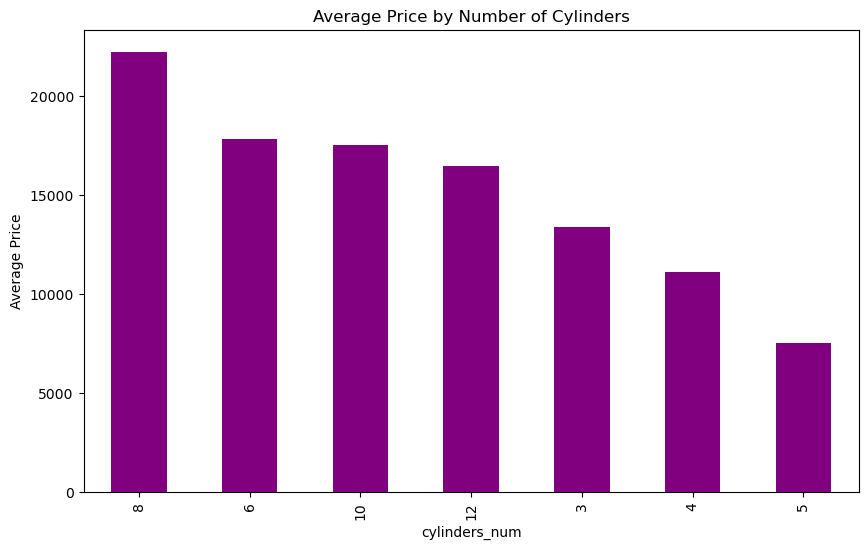

In [22]:
print(df_odometer_no_outliers['cylinders'].value_counts().index)

cylinder_map = {
    '3 cylinders': 3,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '10 cylinders': 10,
    '12 cylinders': 12,
    'other': 0
}
df_odometer_no_outliers['cylinders_num'] = df_odometer_no_outliers['cylinders'].map(cylinder_map)

df_odometer_no_outliers = df_odometer_no_outliers[df_odometer_no_outliers['cylinders_num'] != 0]

print(df_odometer_no_outliers['cylinders_num'].value_counts())

df_odometer_no_outliers.groupby('cylinders_num')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Average Price by Number of Cylinders')
plt.ylabel('Average Price')
plt.show()

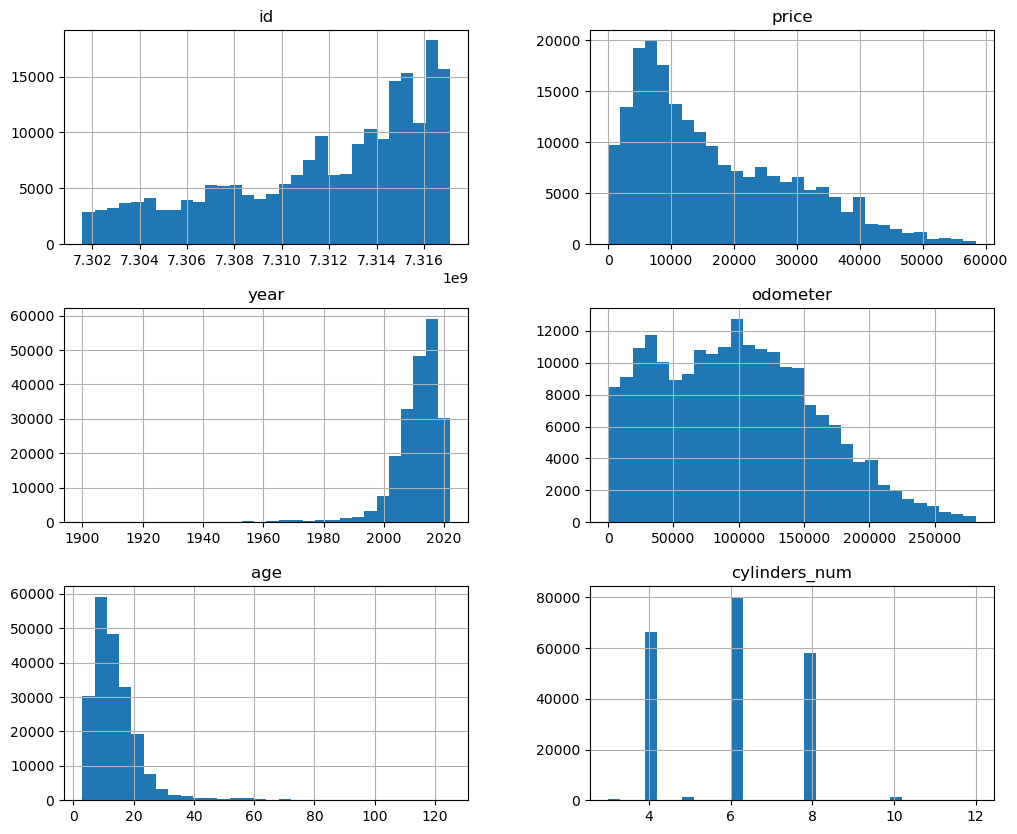

In [23]:
num_cols = df_odometer_no_outliers.select_dtypes(include='number').columns
df_odometer_no_outliers[num_cols].hist(figsize=(12, 10), bins=30);

region with unique values including NaN 404
manufacturer with unique values including NaN 41
model with unique values including NaN 15436
condition with unique values including NaN 7
cylinders with unique values including NaN 7
fuel with unique values including NaN 5
title_status with unique values including NaN 6
transmission with unique values including NaN 3
VIN with unique values including NaN 57882
drive with unique values including NaN 4
size with unique values including NaN 5
type with unique values including NaN 14
paint_color with unique values including NaN 13
state with unique values including NaN 51


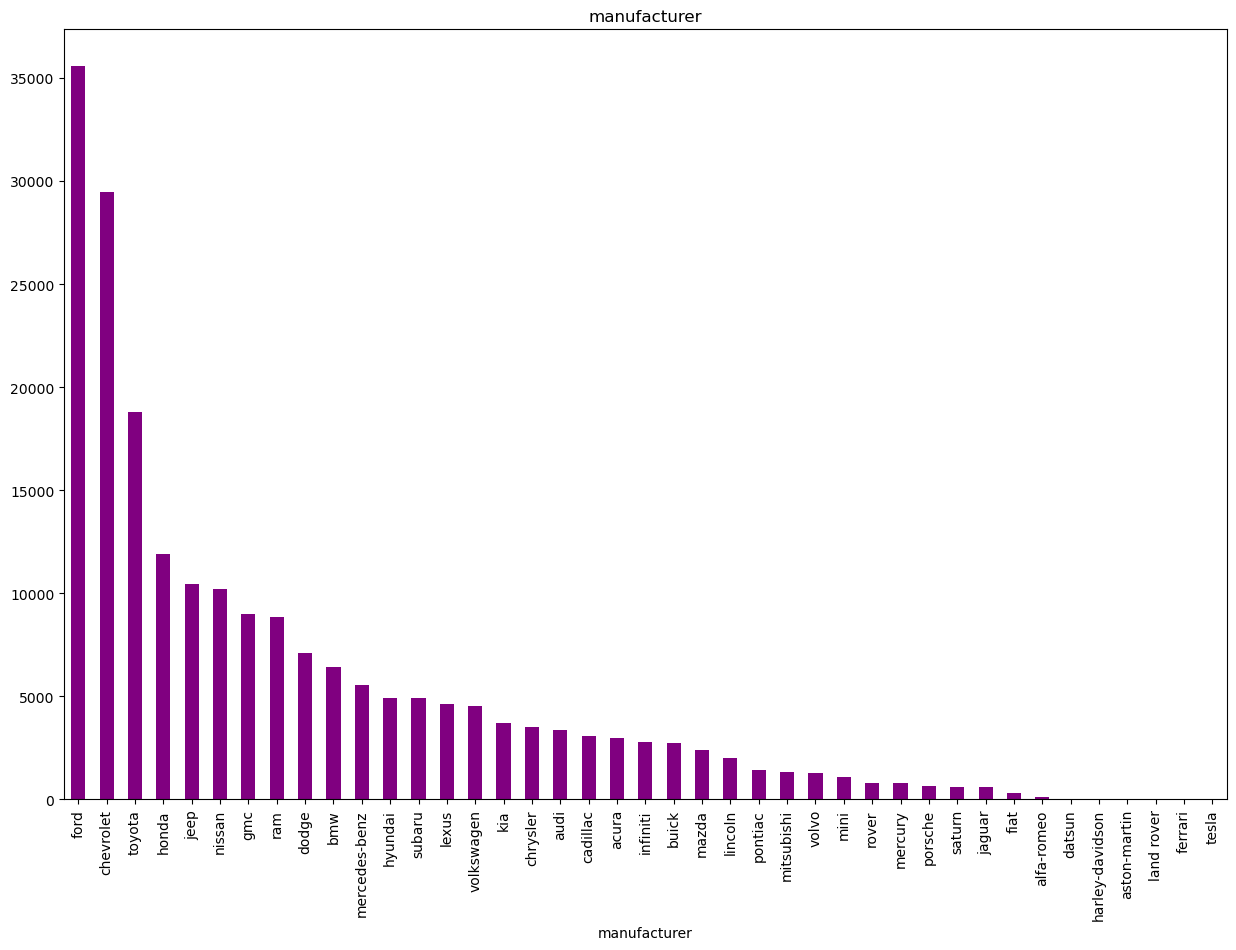

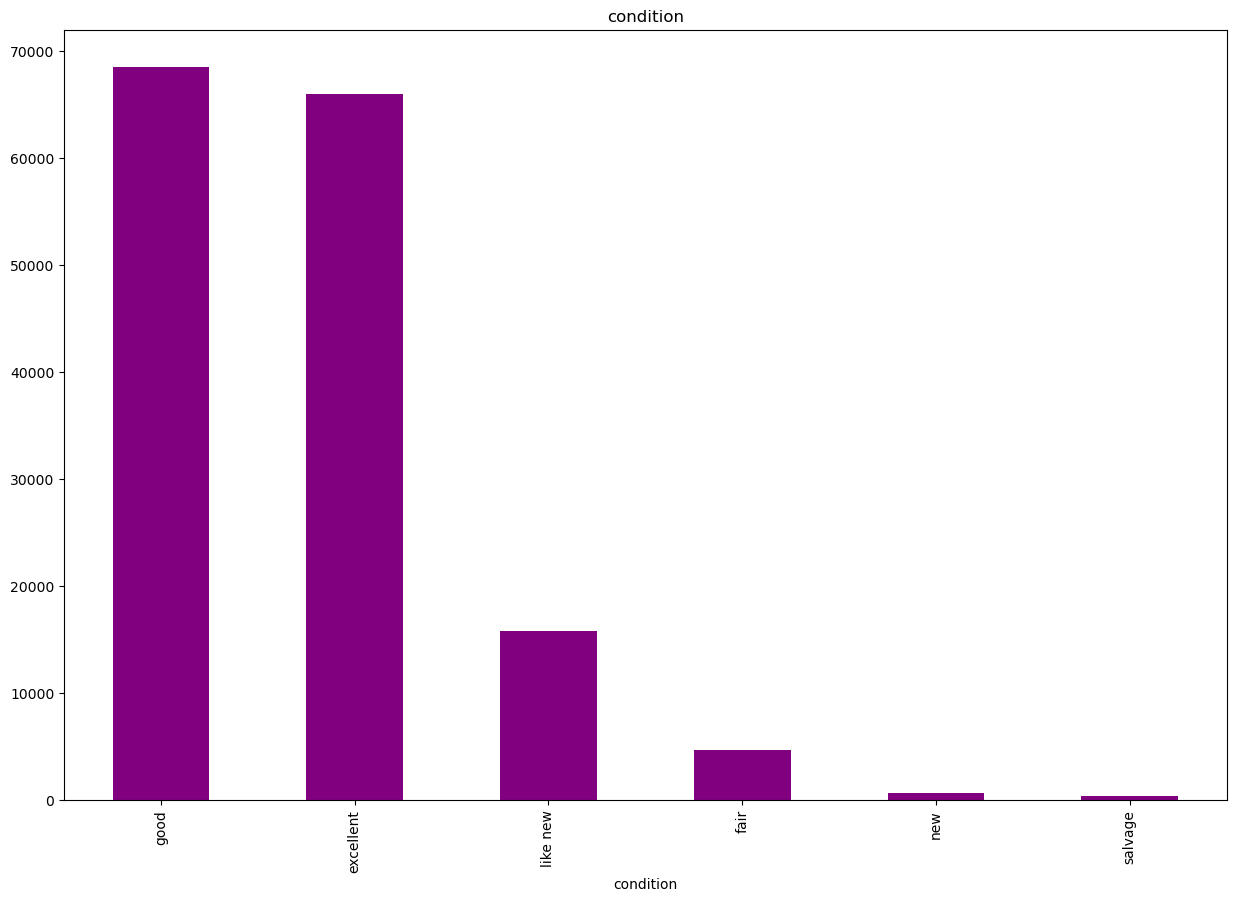

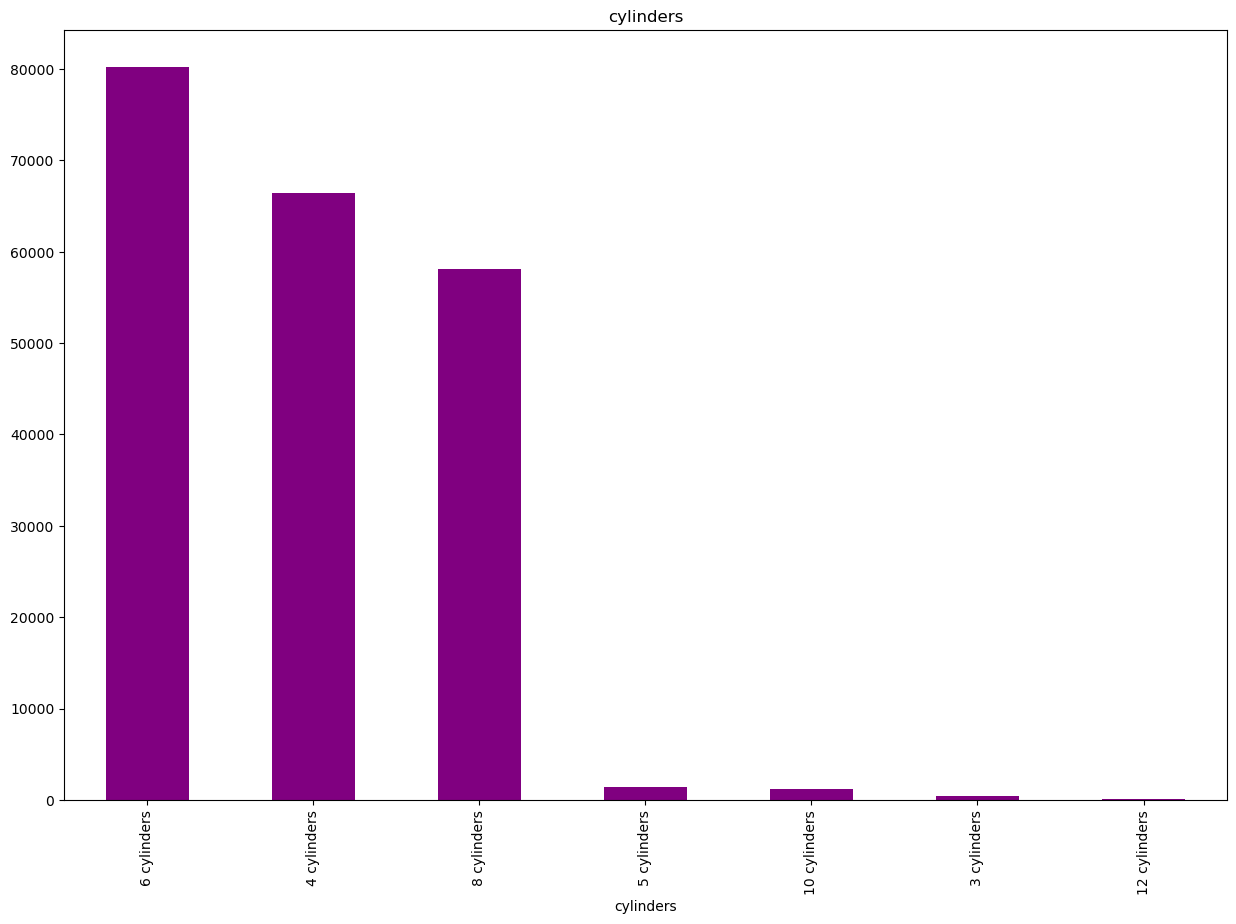

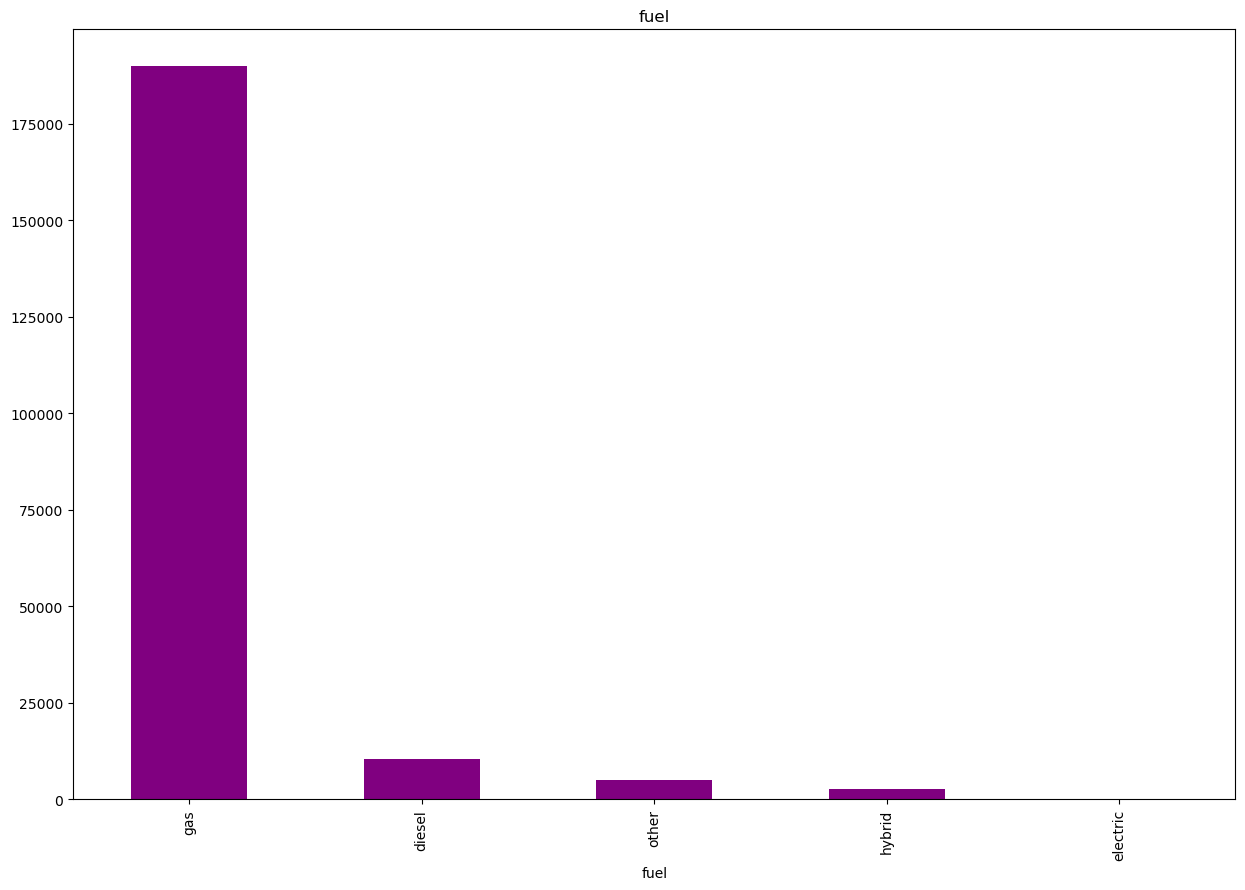

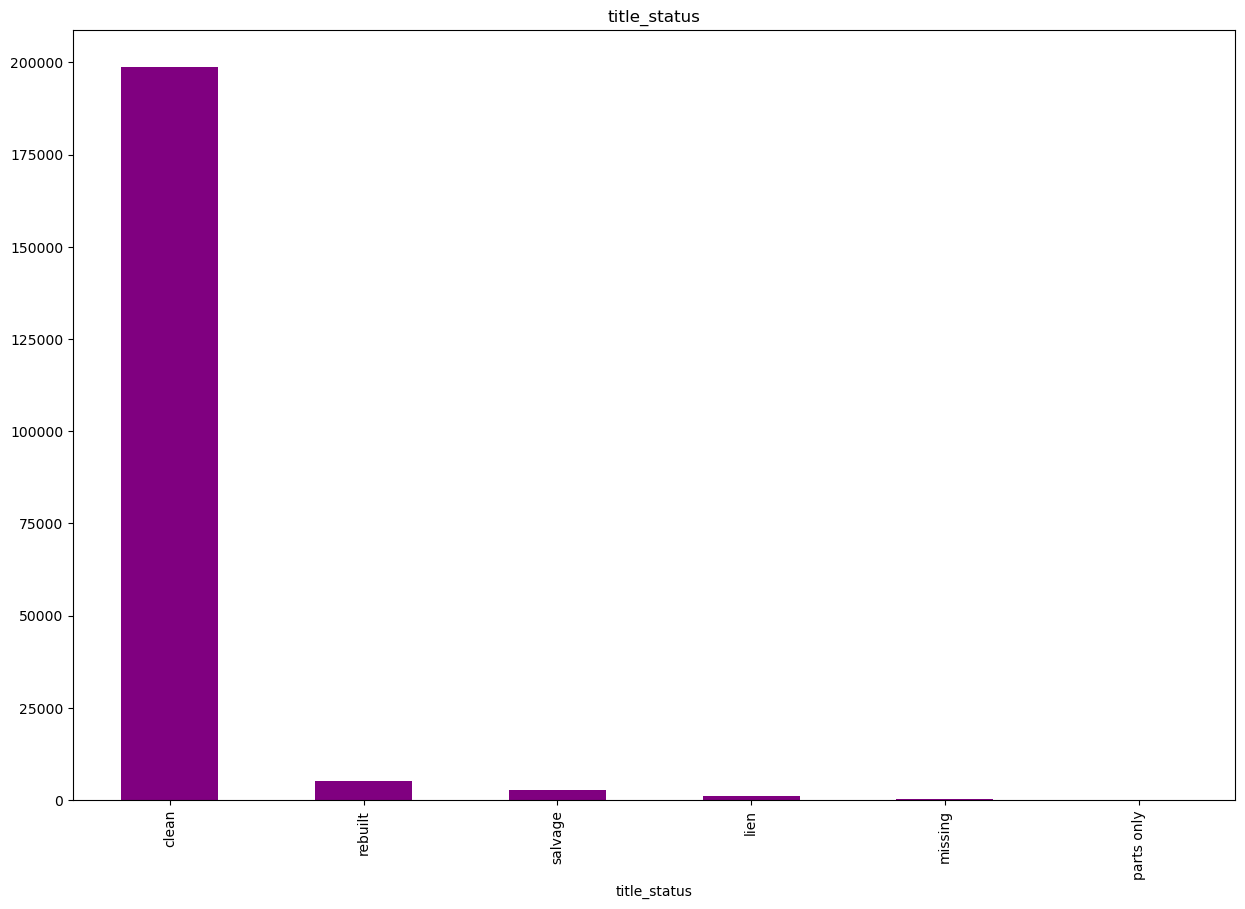

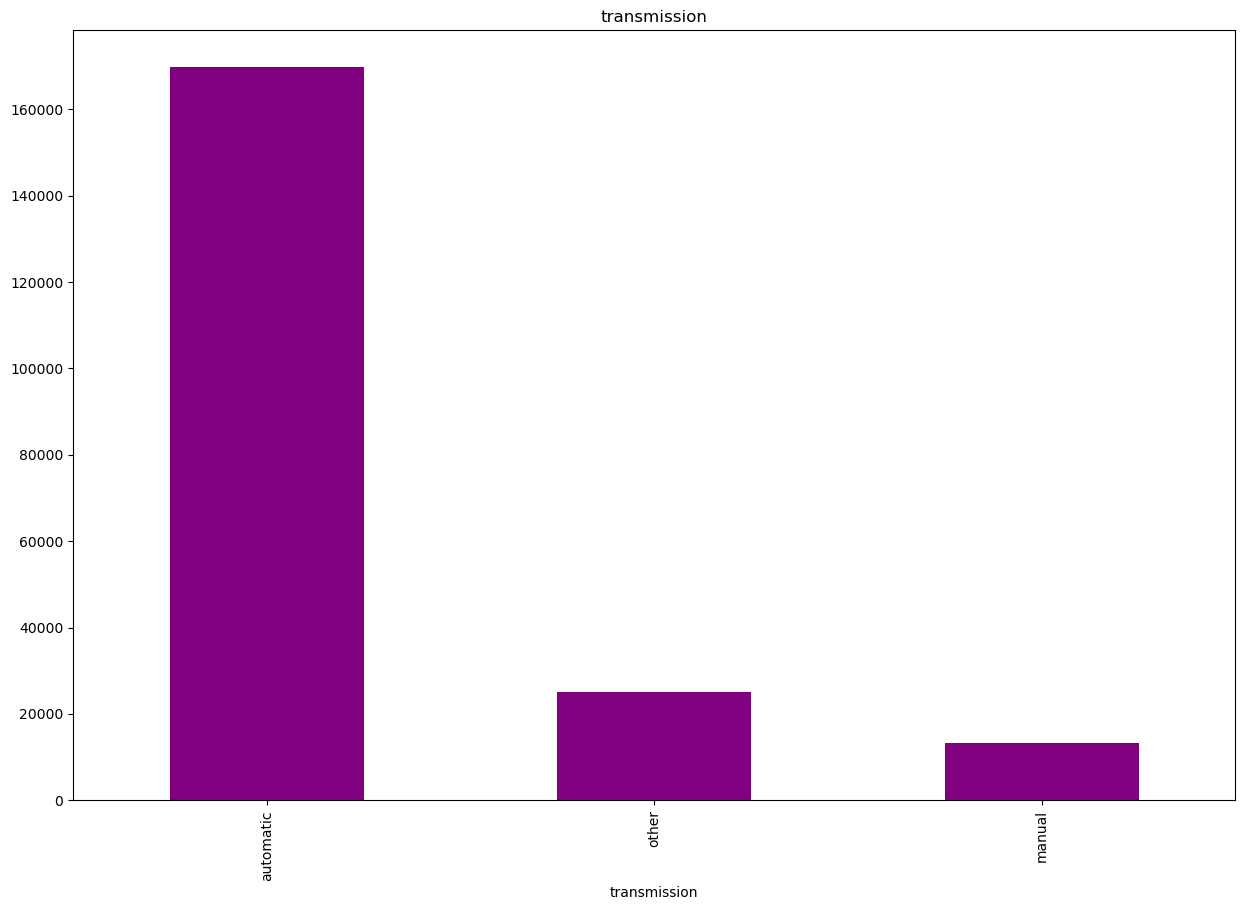

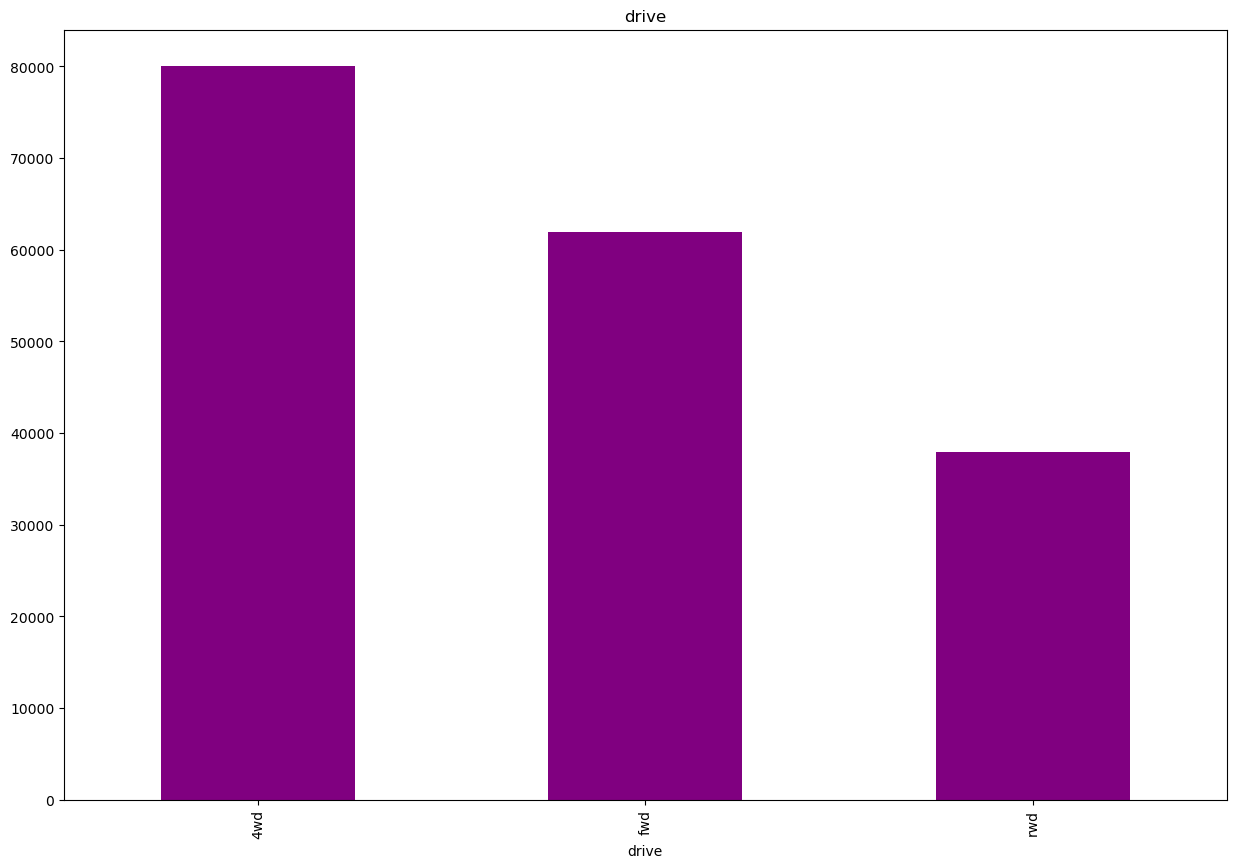

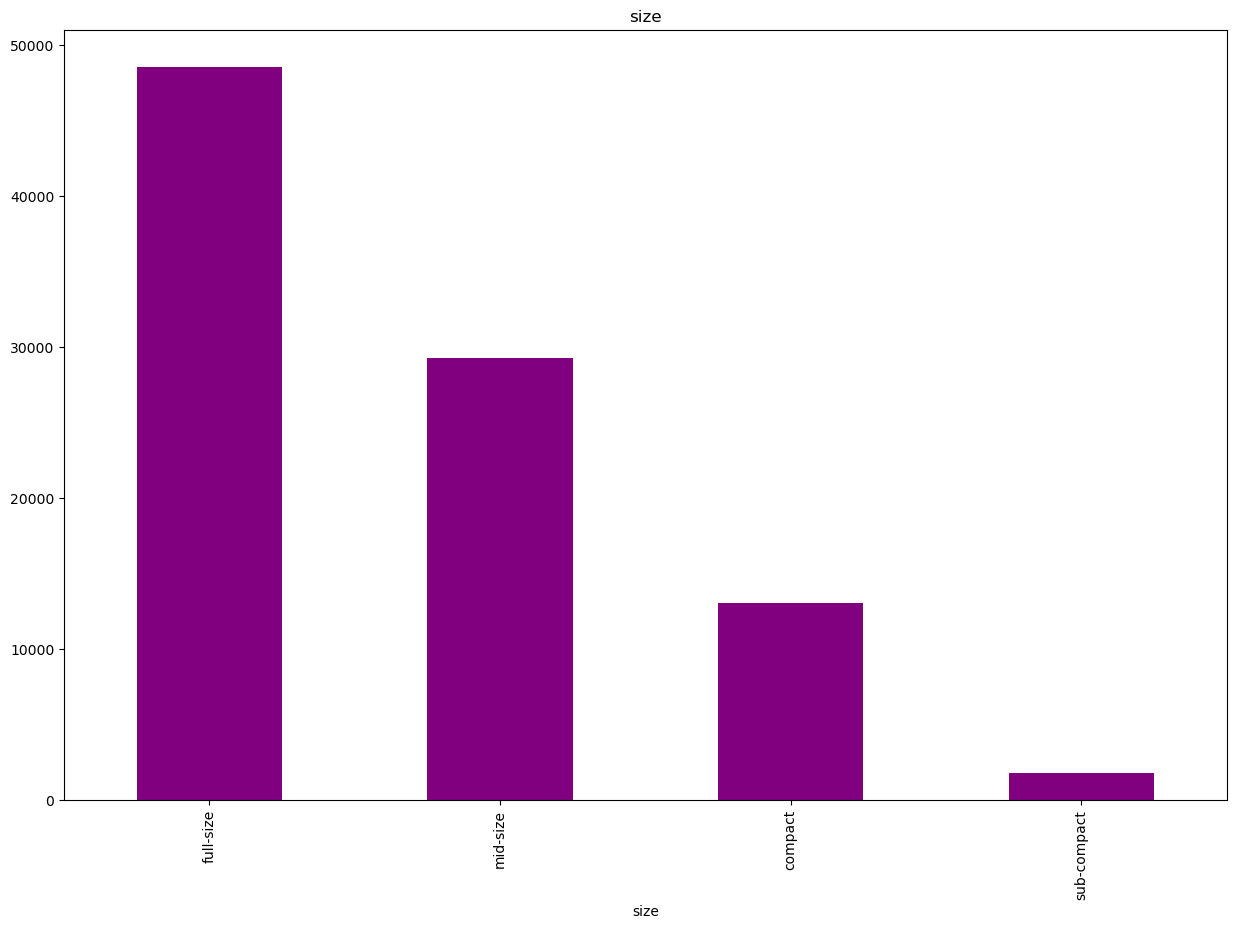

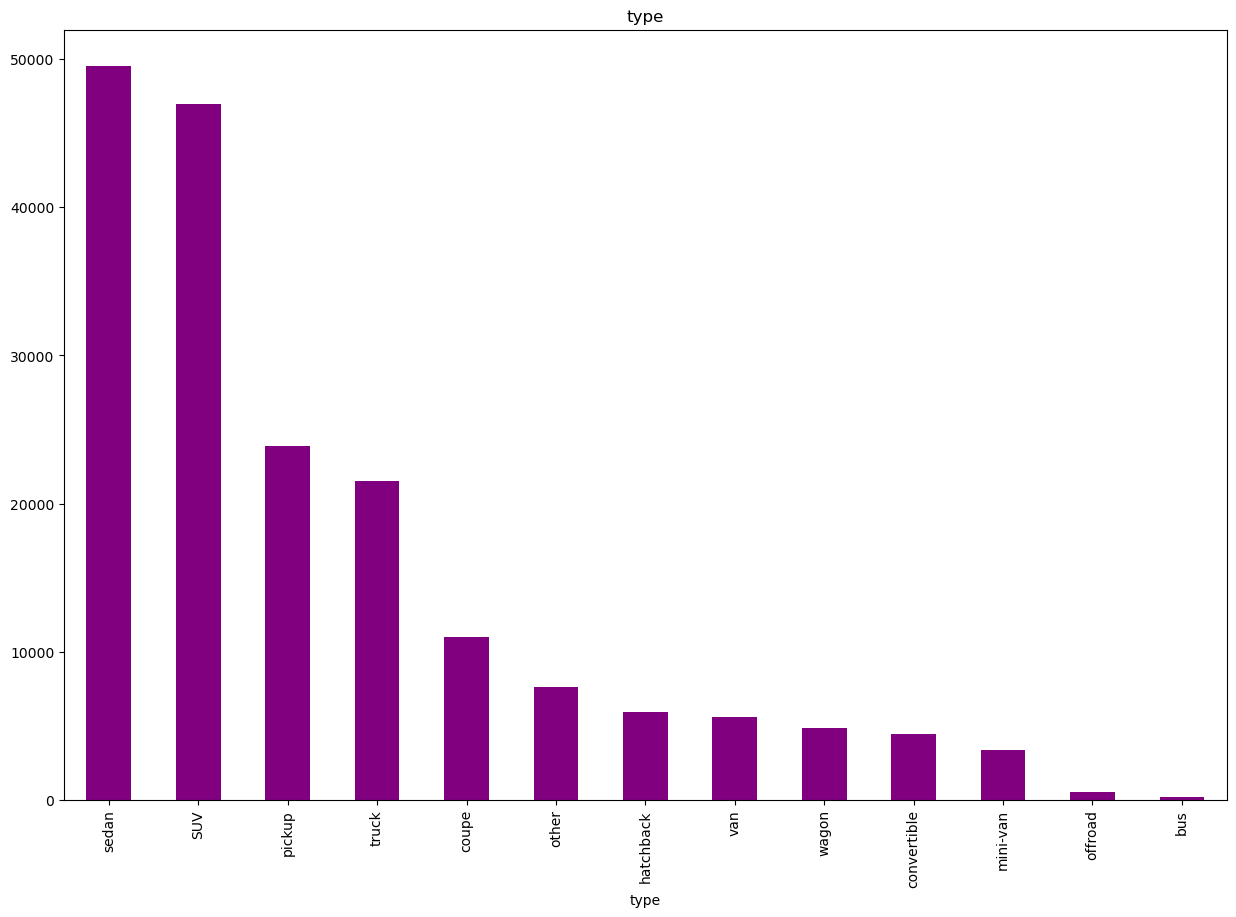

In [24]:
cat_cols = df_odometer_no_outliers.select_dtypes(include='object').columns


for col in cat_cols:
    print(f"{col} with unique values including NaN {df_odometer_no_outliers[col].value_counts(dropna=False).count()}")
    # df_odometer_no_outliers[col].value_counts().plot(kind='bar')
    # plt.title(col)
    # plt.show()
    
cat_cols_selected = [ 'manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type']

for col in cat_cols_selected:
    plt.figure(figsize=(15, 10))
    df_odometer_no_outliers[col].value_counts().plot(kind='bar', color='purple')
    plt.title(col)
    plt.show()


In [25]:
df_odometer_no_outliers["price"].min()

1

#### Bivariate Analysis - Odometer

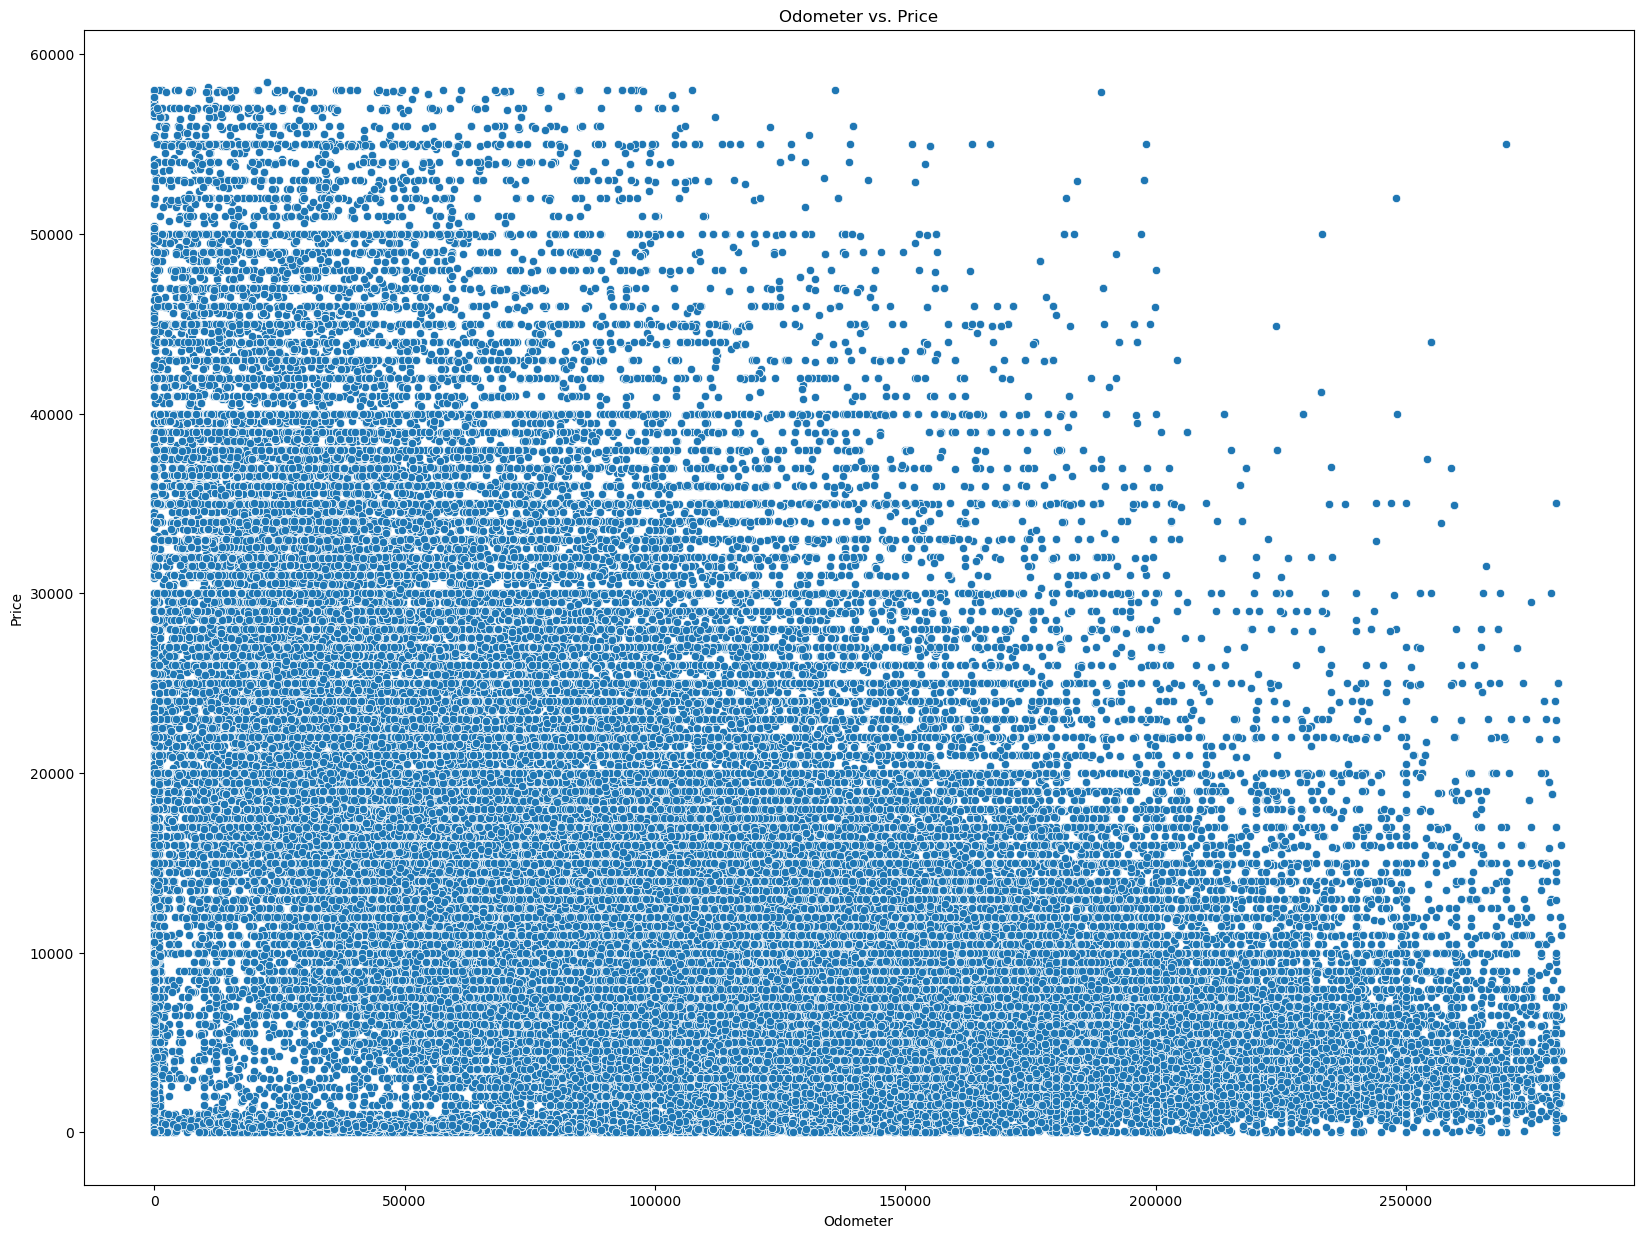

In [26]:
plt.figure(figsize=(20, 15))

sns.scatterplot(x='odometer', y='price', data=df_odometer_no_outliers)
plt.title('Odometer vs. Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()


#### Correlation Coefficient:

###### Close to +1 → strong positive linear relationship.

###### Close to –1 → strong negative linear relationship.

###### Close to 0 → weak/no linear relationship.

In [27]:
df_odometer_no_outliers[['odometer', 'price']].corr()

,odometer,price
odometer,1.000000,-0.548299
price,-0.548299,1.000000


#### Bivariate Analysis - Age

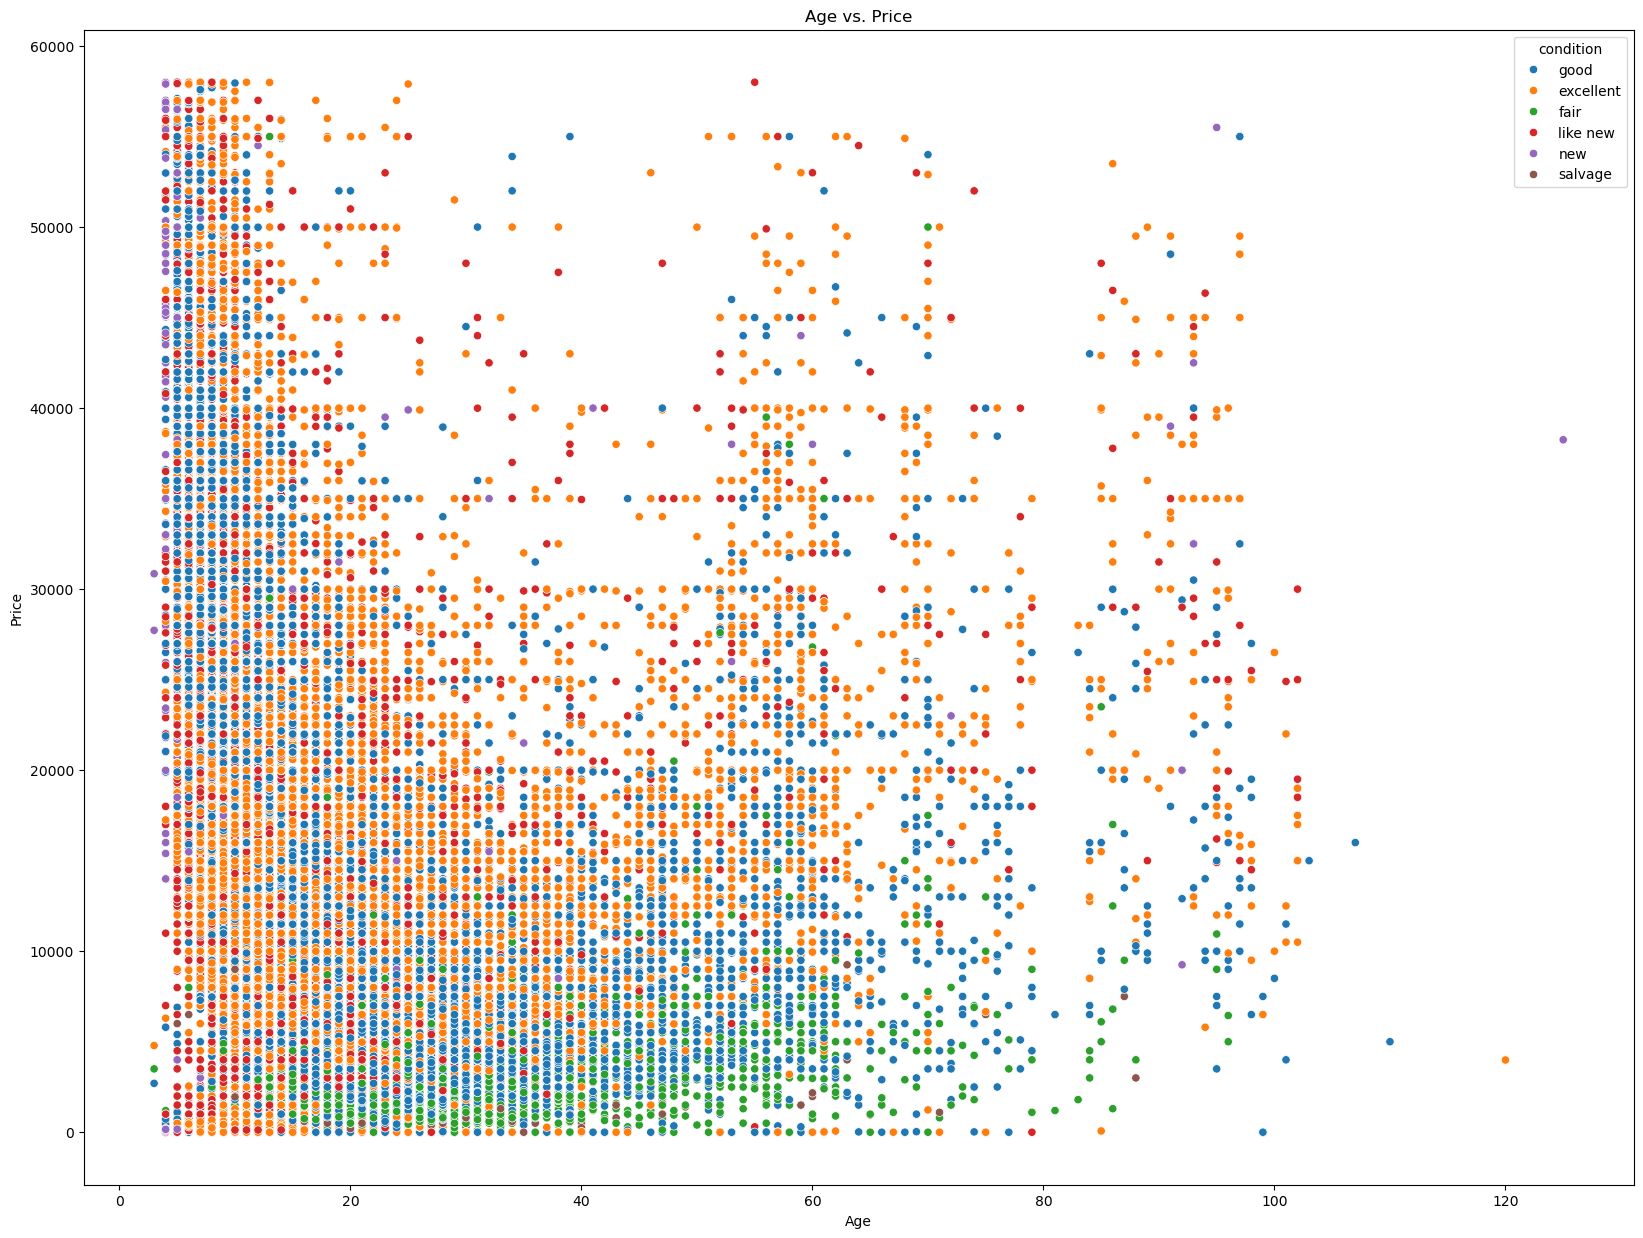

In [28]:
plt.figure(figsize=(20, 15))

sns.scatterplot(x='age', y='price', data=df_odometer_no_outliers, hue='condition')
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

In [29]:
df_odometer_no_outliers[['age', 'price']].corr()

,age,price
age,1.000000,-0.385095
price,-0.385095,1.000000


#### Bivariate Analysis - Condition (Categorical)

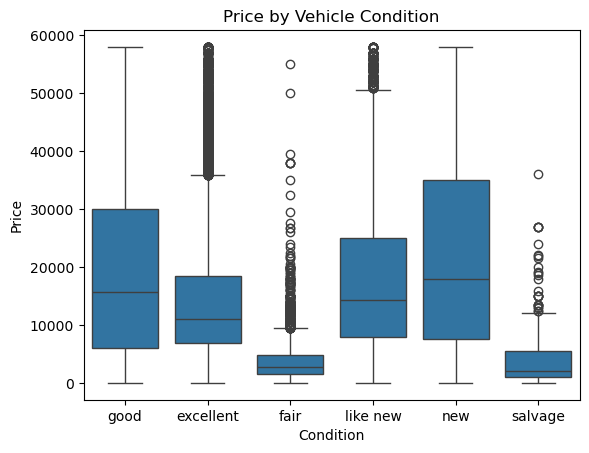

In [30]:
sns.boxplot(x='condition', y='price', data=df_odometer_no_outliers)
plt.title('Price by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


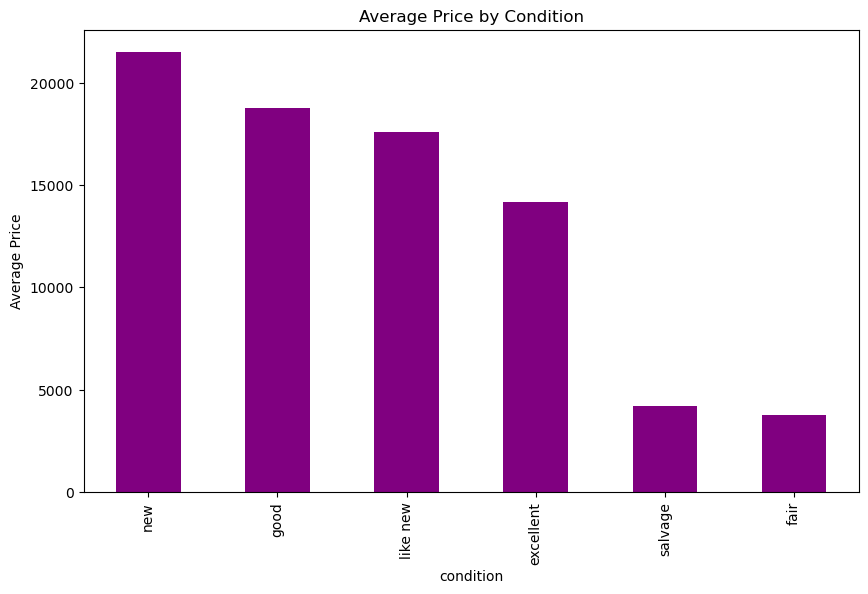

In [31]:
df_odometer_no_outliers.groupby('condition')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Average Price by Condition')
plt.ylabel('Average Price')
plt.show()


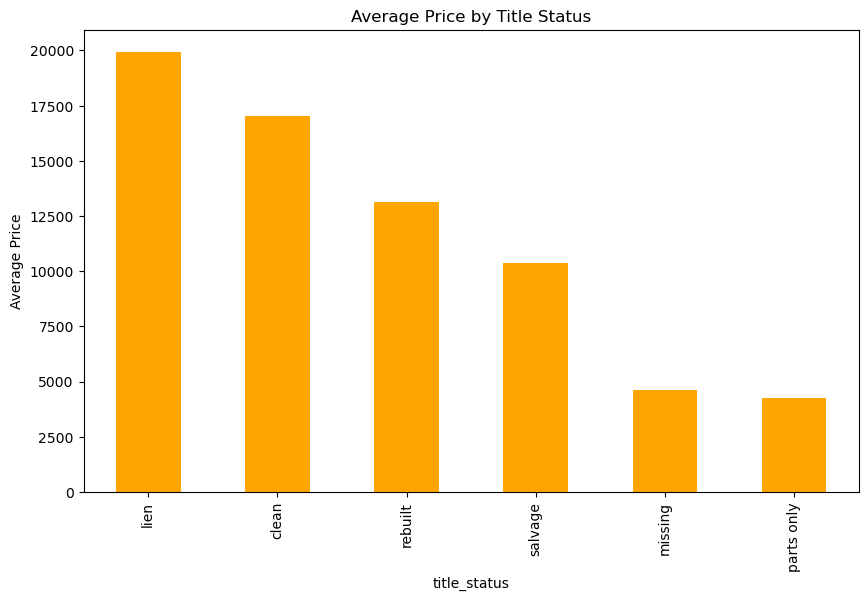

In [32]:
df_odometer_no_outliers.groupby('title_status')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Price by Title Status')
plt.ylabel('Average Price')
plt.show()

#### Multicollinearity Check (Numeric vs. Numeric)

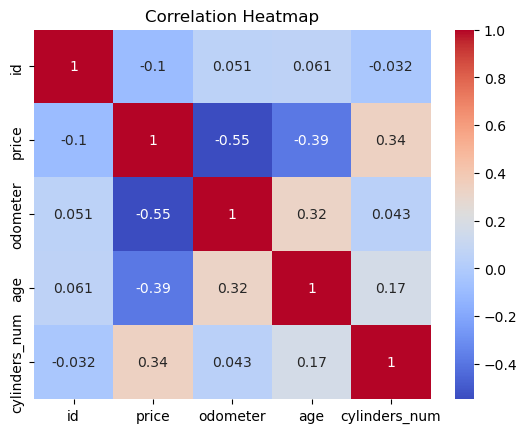

In [33]:
numeric_cols = df_odometer_no_outliers.select_dtypes(include='number').columns

numeric_cols = numeric_cols.drop('year')


corr = df_odometer_no_outliers[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

#### Feature Engineering
##### Numeric features: odometer, age, cylinders_num
##### Categorical features: condition, title_status, size

In [34]:
df_odometer_no_outliers_hot_encoded = pd.get_dummies(df_odometer_no_outliers, columns=['condition', 'title_status', 'size'])

df_odometer_no_outliers_hot_encoded.head()

,id,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,...,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,size_compact,size_full-size,size_mid-size,size_sub-compact
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,57923.0,other,...,True,False,False,False,False,False,False,False,False,False
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,8 cylinders,gas,71229.0,other,...,True,False,False,False,False,False,False,False,False,False
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,19160.0,other,...,True,False,False,False,False,False,False,False,False,False
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,8 cylinders,gas,41124.0,other,...,True,False,False,False,False,False,False,False,False,False
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,6 cylinders,gas,128000.0,automatic,...,True,False,False,False,False,False,False,True,False,False


### Normalize / Scale Numerical Features

In [35]:
numeric_cols = df_odometer_no_outliers_hot_encoded.select_dtypes(include='number').columns.tolist()

numeric_cols = [col for col in numeric_cols if col not in ['price', 'id', "year"]]

numeric_cols

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_odometer_no_outliers_hot_encoded[numeric_cols] = scaler.fit_transform(df_odometer_no_outliers_hot_encoded[numeric_cols])

print(df_odometer_no_outliers_hot_encoded[numeric_cols])


        odometer       age  cylinders_num
27     -0.682501 -0.391217       1.300756
28     -0.461219  0.054314       1.300756
29     -1.327142 -1.059513       1.300756
30     -0.961874 -0.725365       1.300756
31      0.482900 -0.279834       0.042651
...          ...       ...            ...
426864 -0.756473 -0.613982       0.042651
426866 -0.720934 -0.613982       1.300756
426874 -1.133332 -0.836748       0.042651
426875 -1.109850 -0.948130       0.042651
426878 -1.145007 -0.836748       0.042651

[208106 rows x 3 columns]


#### Final DataSet check

In [36]:
df_odometer_no_outliers_hot_encoded.isnull().sum()


id                             0
region                         0
price                          0
year                           0
manufacturer                   0
model                          0
cylinders                      0
fuel                           0
odometer                       0
transmission                   0
VIN                        89222
drive                      28302
type                       22775
paint_color                35112
state                          0
age                            0
cylinders_num                  0
condition_excellent            0
condition_fair                 0
condition_good                 0
condition_like new             0
condition_new                  0
condition_salvage              0
title_status_clean             0
title_status_lien              0
title_status_missing           0
title_status_parts only        0
title_status_rebuilt           0
title_status_salvage           0
size_compact                   0
size_full-

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Train-Test Split (80:20)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

print(df_odometer_no_outliers_hot_encoded.columns.tolist())

df_final = df_odometer_no_outliers_hot_encoded[['id', 'price', 'odometer', 'age', 'cylinders_num', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'title_status_clean', 'title_status_lien', 'title_status_missing', 'title_status_parts only', 'title_status_rebuilt', 'title_status_salvage', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact']]

print(df_final.isnull().sum())

X = df_final.drop(columns=['price'])  # features
y = df_final['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['id', 'region', 'price', 'year', 'manufacturer', 'model', 'cylinders', 'fuel', 'odometer', 'transmission', 'VIN', 'drive', 'type', 'paint_color', 'state', 'age', 'cylinders_num', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'title_status_clean', 'title_status_lien', 'title_status_missing', 'title_status_parts only', 'title_status_rebuilt', 'title_status_salvage', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact']
id                         0
price                      0
odometer                   0
age                        0
cylinders_num              0
condition_excellent        0
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_clean         0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage    

### **Linear Regression

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# mse_linear = mean_squared_error(y_test, y_pred)

# print("Linear Regression:")
# print(f"Coefficients: {linear_model.coef_}")
# print(f"Intercept: {linear_model.intercept_}")
# print(f"Mean Squared Error: {mse_linear.round(2)}\n")
# print(f"Root Mean Squared Error: {np.sqrt(mse_linear).round(2)}\n")

### **Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
# mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# print("Ridge Regression:")
# print(f"Coefficients: {ridge_model.coef_}")
# print(f"Intercept: {ridge_model.intercept_}")
# print(f"Mean Squared Error: {mse_ridge.round(2)}\n")
# print(f"Root Mean Squared Error: {np.sqrt(mse_ridge).round(2)}\n")

Ridge Regression:
Coefficients: [-1.26587738e-04 -5.77191105e+03 -3.58607333e+03  4.84482744e+03
 -1.13151212e+03 -3.35584386e+03  1.13856130e+02 -6.15783956e+02
  8.01974002e+02 -2.56880902e+03  2.35850624e+03  3.72757731e+03
  2.88289252e+01 -2.13962029e+03 -1.76253039e+03 -2.21276180e+03
 -2.27164128e+03 -6.19502742e+02 -1.51822121e+03 -1.54286331e+03]
Intercept: 941185.4900899958
Mean Squared Error: 74229659.05

Root Mean Squared Error: 8615.66



### **LASSO Regression

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# print("LASSO Regression:")
# print(f"Coefficients: {lasso_model.coef_}")
# print(f"Intercept: {lasso_model.intercept_}")
# print(f"Mean Squared Error: {mse_lasso.round(2)}\n")
# print(f"Root Mean Squared Error: {np.sqrt(mse_lasso).round(2)}\n")

LASSO Regression:
Coefficients: [-1.26666336e-04 -5.77408136e+03 -3.58698486e+03  4.84631350e+03
 -1.12435573e+03 -3.30181303e+03  1.18295245e+02 -5.99174416e+02
  4.82652276e+02 -2.14954534e+03  2.82534163e+03  3.99424658e+03
  0.00000000e+00 -0.00000000e+00 -1.25866092e+03 -1.70204616e+03
 -2.24993054e+03 -6.09568475e+02 -1.50595050e+03 -1.41853832e+03]
Intercept: 941280.4773678088
Mean Squared Error: 74238143.24

Root Mean Squared Error: 8616.16



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [41]:
# 1. Linear Regression

mse_linear = mean_squared_error(y_test, y_pred)

print("Linear Regression:")
print(f"Coefficients: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")
print(f"Mean Squared Error: {mse_linear.round(2)}\n")
print(f"Root Mean Squared Error: {np.sqrt(mse_linear).round(2)}\n")

Linear Regression:
Coefficients: [-1.26586309e-04 -5.77192007e+03 -3.58602210e+03  4.84482934e+03
 -1.13169836e+03 -3.35688063e+03  1.13672342e+02 -6.16015229e+02
  8.03376484e+02 -2.57482071e+03  2.36334997e+03  3.73698926e+03
  3.42715242e+01 -2.16806265e+03 -1.75807118e+03 -2.20847692e+03
 -2.27185749e+03 -6.19538249e+02 -1.51829713e+03 -1.54398841e+03]
Intercept: 941170.4172789633
Mean Squared Error: 74229605.91

Root Mean Squared Error: 8615.66



In [42]:
# Ridge Regression

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_}")
print(f"Mean Squared Error: {mse_ridge.round(2)}\n")
print(f"Root Mean Squared Error: {np.sqrt(mse_ridge).round(2)}\n")

Ridge Regression:
Coefficients: [-1.26587738e-04 -5.77191105e+03 -3.58607333e+03  4.84482744e+03
 -1.13151212e+03 -3.35584386e+03  1.13856130e+02 -6.15783956e+02
  8.01974002e+02 -2.56880902e+03  2.35850624e+03  3.72757731e+03
  2.88289252e+01 -2.13962029e+03 -1.76253039e+03 -2.21276180e+03
 -2.27164128e+03 -6.19502742e+02 -1.51822121e+03 -1.54286331e+03]
Intercept: 941185.4900899958
Mean Squared Error: 74229659.05

Root Mean Squared Error: 8615.66



In [43]:
# Lasso Regression

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("LASSO Regression:")
print(f"Coefficients: {lasso_model.coef_}")
print(f"Intercept: {lasso_model.intercept_}")
print(f"Mean Squared Error: {mse_lasso.round(2)}\n")
print(f"Root Mean Squared Error: {np.sqrt(mse_lasso).round(2)}\n")

LASSO Regression:
Coefficients: [-1.26666336e-04 -5.77408136e+03 -3.58698486e+03  4.84631350e+03
 -1.12435573e+03 -3.30181303e+03  1.18295245e+02 -5.99174416e+02
  4.82652276e+02 -2.14954534e+03  2.82534163e+03  3.99424658e+03
  0.00000000e+00 -0.00000000e+00 -1.25866092e+03 -1.70204616e+03
 -2.24993054e+03 -6.09568475e+02 -1.50595050e+03 -1.41853832e+03]
Intercept: 941280.4773678088
Mean Squared Error: 74238143.24

Root Mean Squared Error: 8616.16



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.